# **ONLINE RETAIL SHIPPING DATASET**

## Business Background

The dataset is from an online retail business that deals with the shipment of products to customers. The company operates various warehouses and uses multiple modes of shipment, including flight, ship, and road. The dataset includes details about customer care interactions, customer ratings, the cost of products, prior purchases, product importance, customer gender, discounts offered, product weight, and whether the shipment reached on time.

## Business Problem

The primary business problem is to improve the on-time delivery rate of shipments. Delays in deliveries can lead to customer dissatisfaction, negative reviews, and loss of future sales. By analyzing the factors that influence delivery times, the company can identify areas for improvement and implement strategies to ensure timely deliveries.

## Data Analysis Goals

The primary goal of the data analysis is to investigate the factors affecting the on-time delivery of products. This includes:

* Analyzing the impact of different warehouse blocks and shipment modes on delivery times.
* Assessing the relationship between customer care calls and customer ratings with delivery performance.
* Examining the influence of discounts offered and product weight on the delivery times.
* Identifying any trends or patterns in the data that can help predict delays and improve the logistics process.

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing & Cleaning Dataset

In [5]:
# Load dataset
df = pd.read_csv('Online Retail Shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
# check column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
# check null values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types

(ID                     0
 Warehouse_block        0
 Mode_of_Shipment       0
 Customer_care_calls    0
 Customer_rating        0
 Cost_of_the_Product    0
 Prior_purchases        0
 Product_importance     0
 Gender                 0
 Discount_offered       0
 Weight_in_gms          0
 Reached.on.Time_Y.N    0
 dtype: int64,
 ID                      int64
 Warehouse_block        object
 Mode_of_Shipment       object
 Customer_care_calls     int64
 Customer_rating         int64
 Cost_of_the_Product     int64
 Prior_purchases         int64
 Product_importance     object
 Gender                 object
 Discount_offered        int64
 Weight_in_gms           int64
 Reached.on.Time_Y.N     int64
 dtype: object)

In [8]:
# Checking unique values in categorical columns
warehouse_block_unique = df['Warehouse_block'].unique()
mode_of_shipment_unique = df['Mode_of_Shipment'].unique()
product_importance_unique = df['Product_importance'].unique()
gender_unique = df['Gender'].unique()

warehouse_block_unique, mode_of_shipment_unique, product_importance_unique, gender_unique


(array(['D', 'F', 'A', 'B', 'C'], dtype=object),
 array(['Flight', 'Ship', 'Road'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object),
 array(['F', 'M'], dtype=object))

Based on the data dictionary, the company has a big warehouse that is divided into blocks A-E, so we need to change the warehouse block 'F' to 'E' 

In [9]:
# Changing warehouse_block 'F' to 'E'
df['Warehouse_block'] = df['Warehouse_block'].replace('F', 'E')

# Verifying the change
warehouse_block_unique_updated = df['Warehouse_block'].unique()
warehouse_block_unique_updated

array(['D', 'E', 'A', 'B', 'C'], dtype=object)

In [10]:
# Check for any duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for column description (numerical)
numerical_summary = df.describe().T

# Check for column description (categorical/object)
categorical_summary = df.describe(include=['object'])

display(duplicate_rows, numerical_summary, categorical_summary)

0

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,E,Ship,low,F
freq,3666,7462,5297,5545


Checking if there is any outlier using boxplot

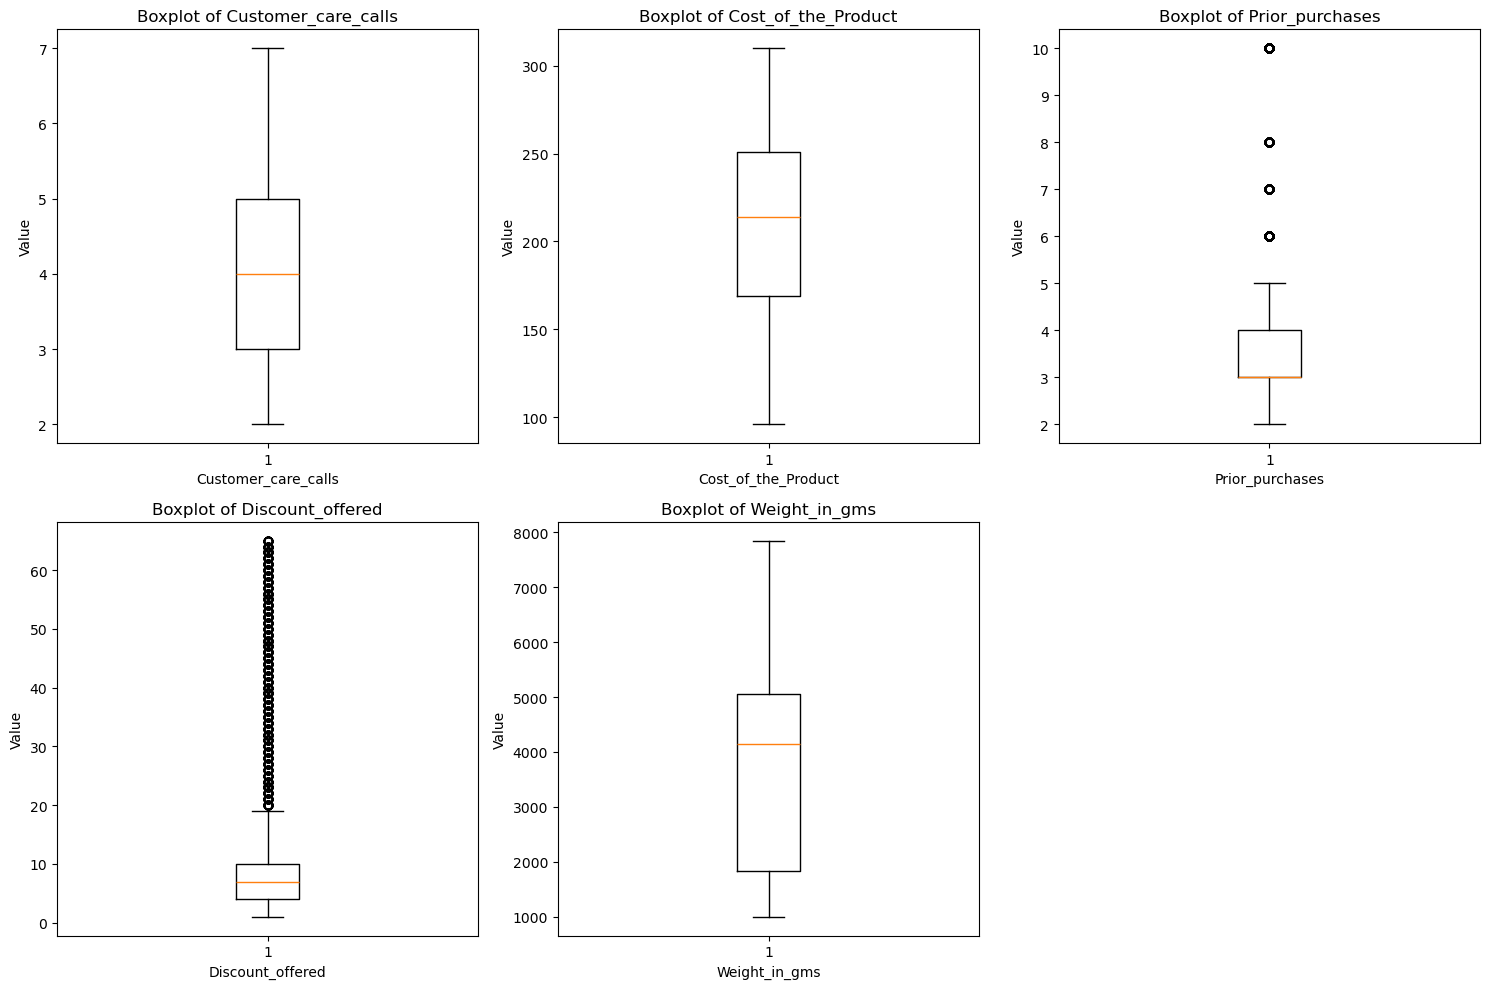

In [17]:
# List of columns to check for outliers
columns_to_check = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Plotting boxplots for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

From the boxplot we can see that only column 'Discount_offered' and 'Prior_purchases' have outliers. After identifying which column has outlier, we check the outlier wether it is necessary or not.

In [18]:
# Function to identify outliers using IQR method
for i in ['Prior_purchases','Discount_offered']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    display(df[['ID',i]][(df[i] < lower_bound) | (df[i] > upper_bound)])

,ID,Prior_purchases
37,38,6
62,63,6
74,75,6
90,91,6
133,134,6
...,...,...
10981,10982,6
10983,10984,6
10990,10991,6
10993,10994,6


,ID,Discount_offered
0,1,44
1,2,59
2,3,48
4,5,46
7,8,48
...,...,...
3128,3129,24
3130,3131,50
3131,3132,55
3132,3133,21


After checking the outliers, there are no anomaly or nonsensical data. Therefore we need to keep the outliers included in the analysis.

In [76]:
# Save the cleaned dataset to csv
df.to_csv('Online Retail Shipping(clean).csv',index=False)

## Data Analysis

After examining the data types and data consistency, it appears that the data is already clean and consistent. With the data clean and ready, we can proceed to analyze the data to achieve analysis goals. To address the business problem and achieve the data analysis goal, we'll focus on the following analyses:
1. Delivery Time Analysis
    * Compare delivery times across different warehouse blocks and modes of shipment.
    * Investigate if certain product importance levels affect delivery times.

2. Customer Interaction Analysis
    * Analyze the relationship between customer care calls and customer ratings with delivery timeliness.

3. Discount and Weight Analysis
    * Examine the impact of discounts offered and product weight on delivery times.

4. Correlation Analysis
    * Determine correlations between various factors and delivery timeliness.

### 1. Plotting Delivery times by warehouse block and mode of shipment

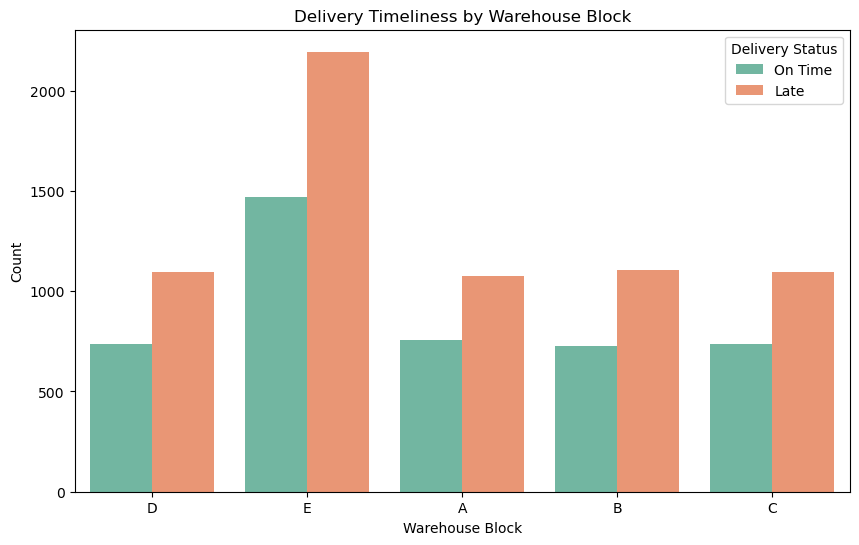

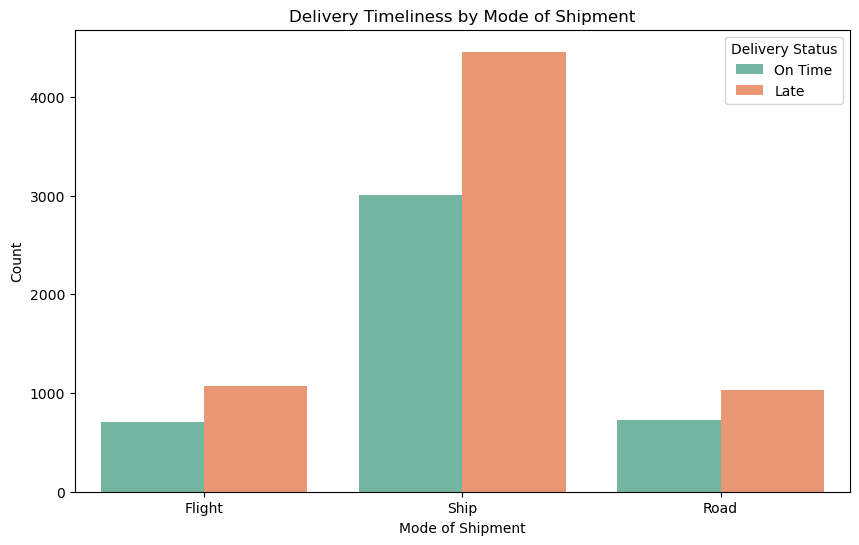

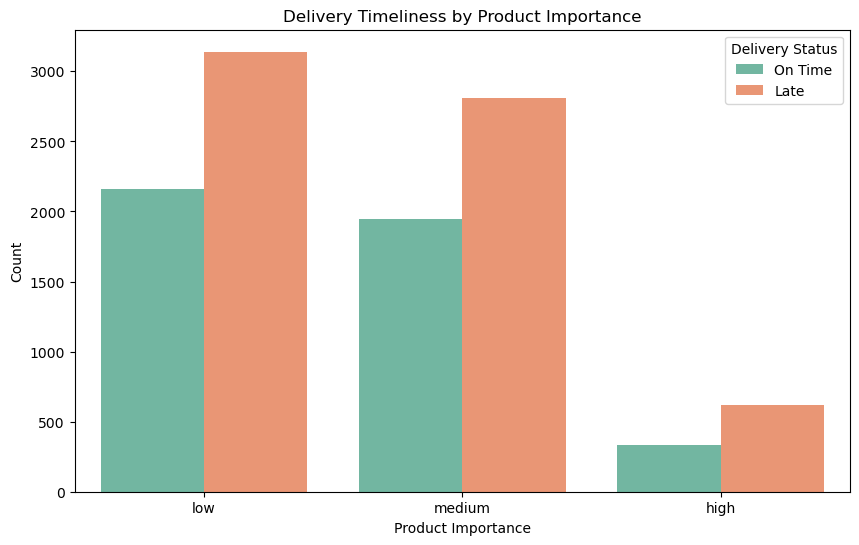

In [30]:
# Set the correct interpretation for the legend
reached_on_time_legend = {0: 'On Time', 1: 'Late'}

# Delivery times by warehouse block
plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette="Set2")
plt.title('Delivery Timeliness by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=[reached_on_time_legend[key] for key in sorted(reached_on_time_legend.keys())])
plt.show()

# Delivery times by mode of shipment
plt.figure(figsize=(10, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette="Set2")
plt.title('Delivery Timeliness by Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=[reached_on_time_legend[key] for key in sorted(reached_on_time_legend.keys())])
plt.show()

# Delivery times by product importance
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette="Set2")
plt.title('Delivery Timeliness by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=[reached_on_time_legend[key] for key in sorted(reached_on_time_legend.keys())])
plt.show()

From the graph above we can say that:
* Warehouse block, mode of shipment, and product importance have no significant effect to the delivery time with each having more or less same proportion of late and on-time delivery.
* Warehouse block E has the most shipment/orders doubling the other warehouse block orders.
* Shipment mode by ship is significantly higher than the other mode of shipment and seemingly have higher late percentage than other ship method (need further analysis)
* Product importance have no significant impact to the delivery times.

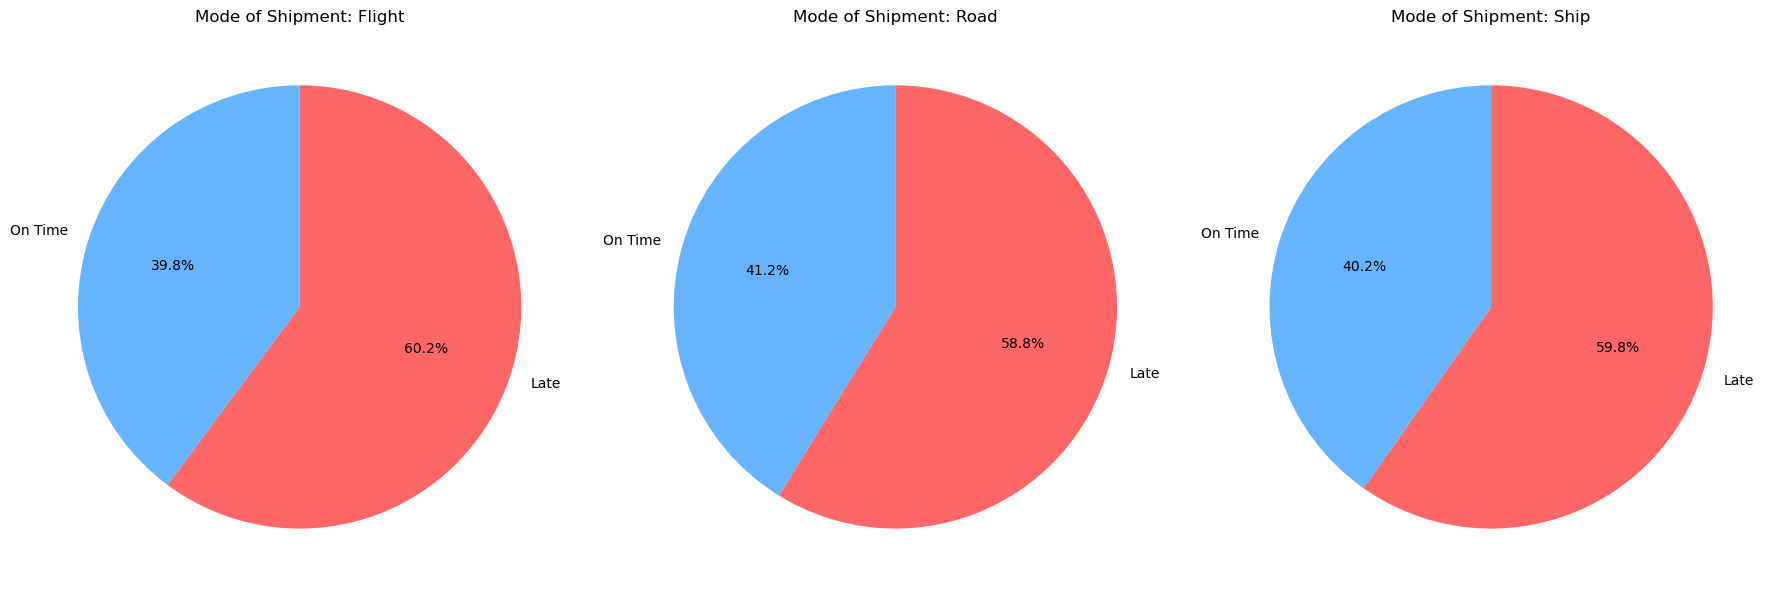

In [33]:
# Create a pie chart for mode of shipment and delivery timeliness
shipment_timeline = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack()

# Define the labels for the legend
reached_on_time_legend = {0: 'On Time', 1: 'Late'}

# Plotting the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, mode in enumerate(shipment_timeline.index):
    axes[i].pie(shipment_timeline.loc[mode], labels=shipment_timeline.columns.map(reached_on_time_legend), autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
    axes[i].set_title(f'Mode of Shipment: {mode}')

plt.tight_layout()
plt.show()

Turns out the 3 mode of shipment have similar proportion of late and on time deliveries, so the mode of shipment have no significant impact to delivery times.

### 2. Customer Interaction Analysis

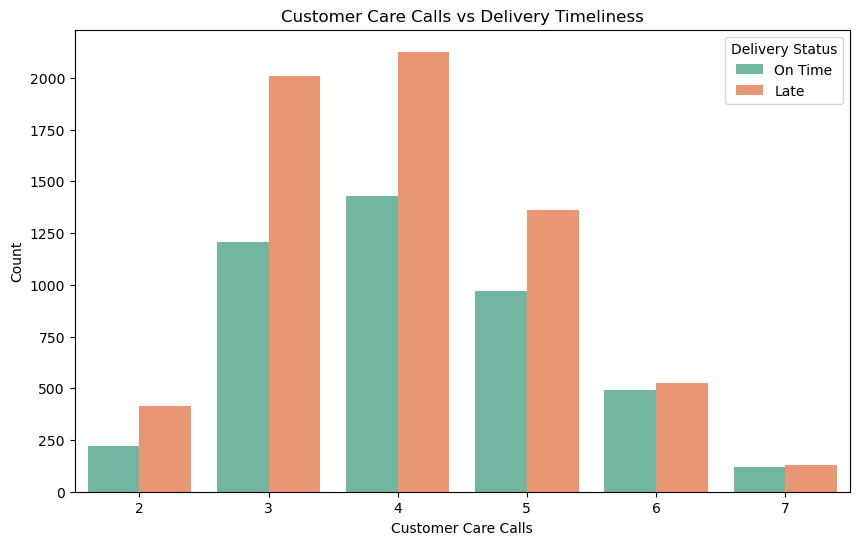

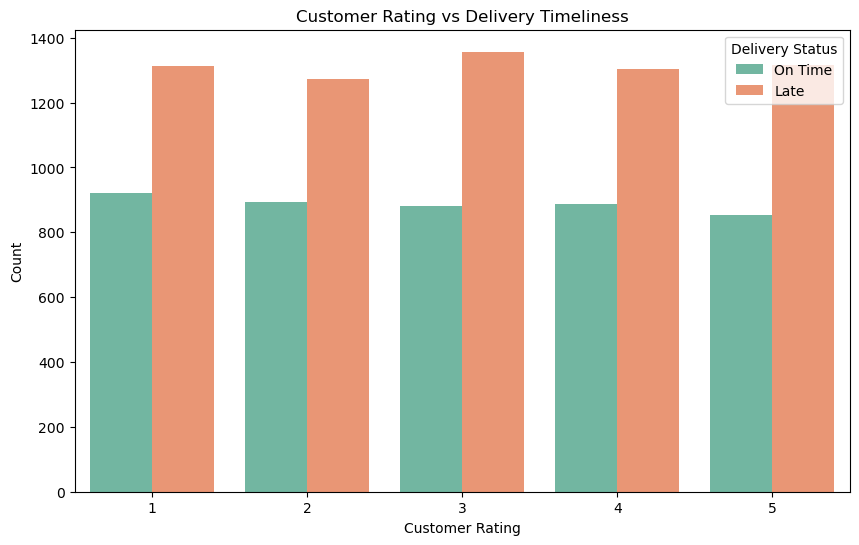

In [35]:
# Customer care calls vs delivery timeliness
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette="Set2")
plt.title('Customer Care Calls vs Delivery Timeliness')
plt.xlabel('Customer Care Calls')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=[reached_on_time_legend[key] for key in sorted(reached_on_time_legend.keys())])
plt.show()

# Customer rating vs delivery timeliness
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=df, palette="Set2")
plt.title('Customer Rating vs Delivery Timeliness')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.legend(title='Delivery Status', labels=[reached_on_time_legend[key] for key in sorted(reached_on_time_legend.keys())])
plt.show()

From the graph we can see:
1. Customer care calls have no significant effect to delivery times with each having similar proportion of late and on time delivery
2. Delivery time have no significant impact to the rating given by customer after recieving the product.
3. We can't say that improving the delivery time will improve the customer rating based on the graph.

### 3. Discount and Weight Analysis

In [ ]:
# Checking cost of the product and weight based on the mode of shipment

df.groupby('Mode_of_Shipment')[['Cost_of_the_Product','Weight_in_gms']].agg(['count','sum'])

Cost_of_the_Product          Weight_in_gms          
                               count      sum         count       sum
Mode_of_Shipment                                                     
Flight                          1777   371938          1777   6449405
Road                            1760   370437          1760   6423209
Ship                            7462  1569580          7462  27097936

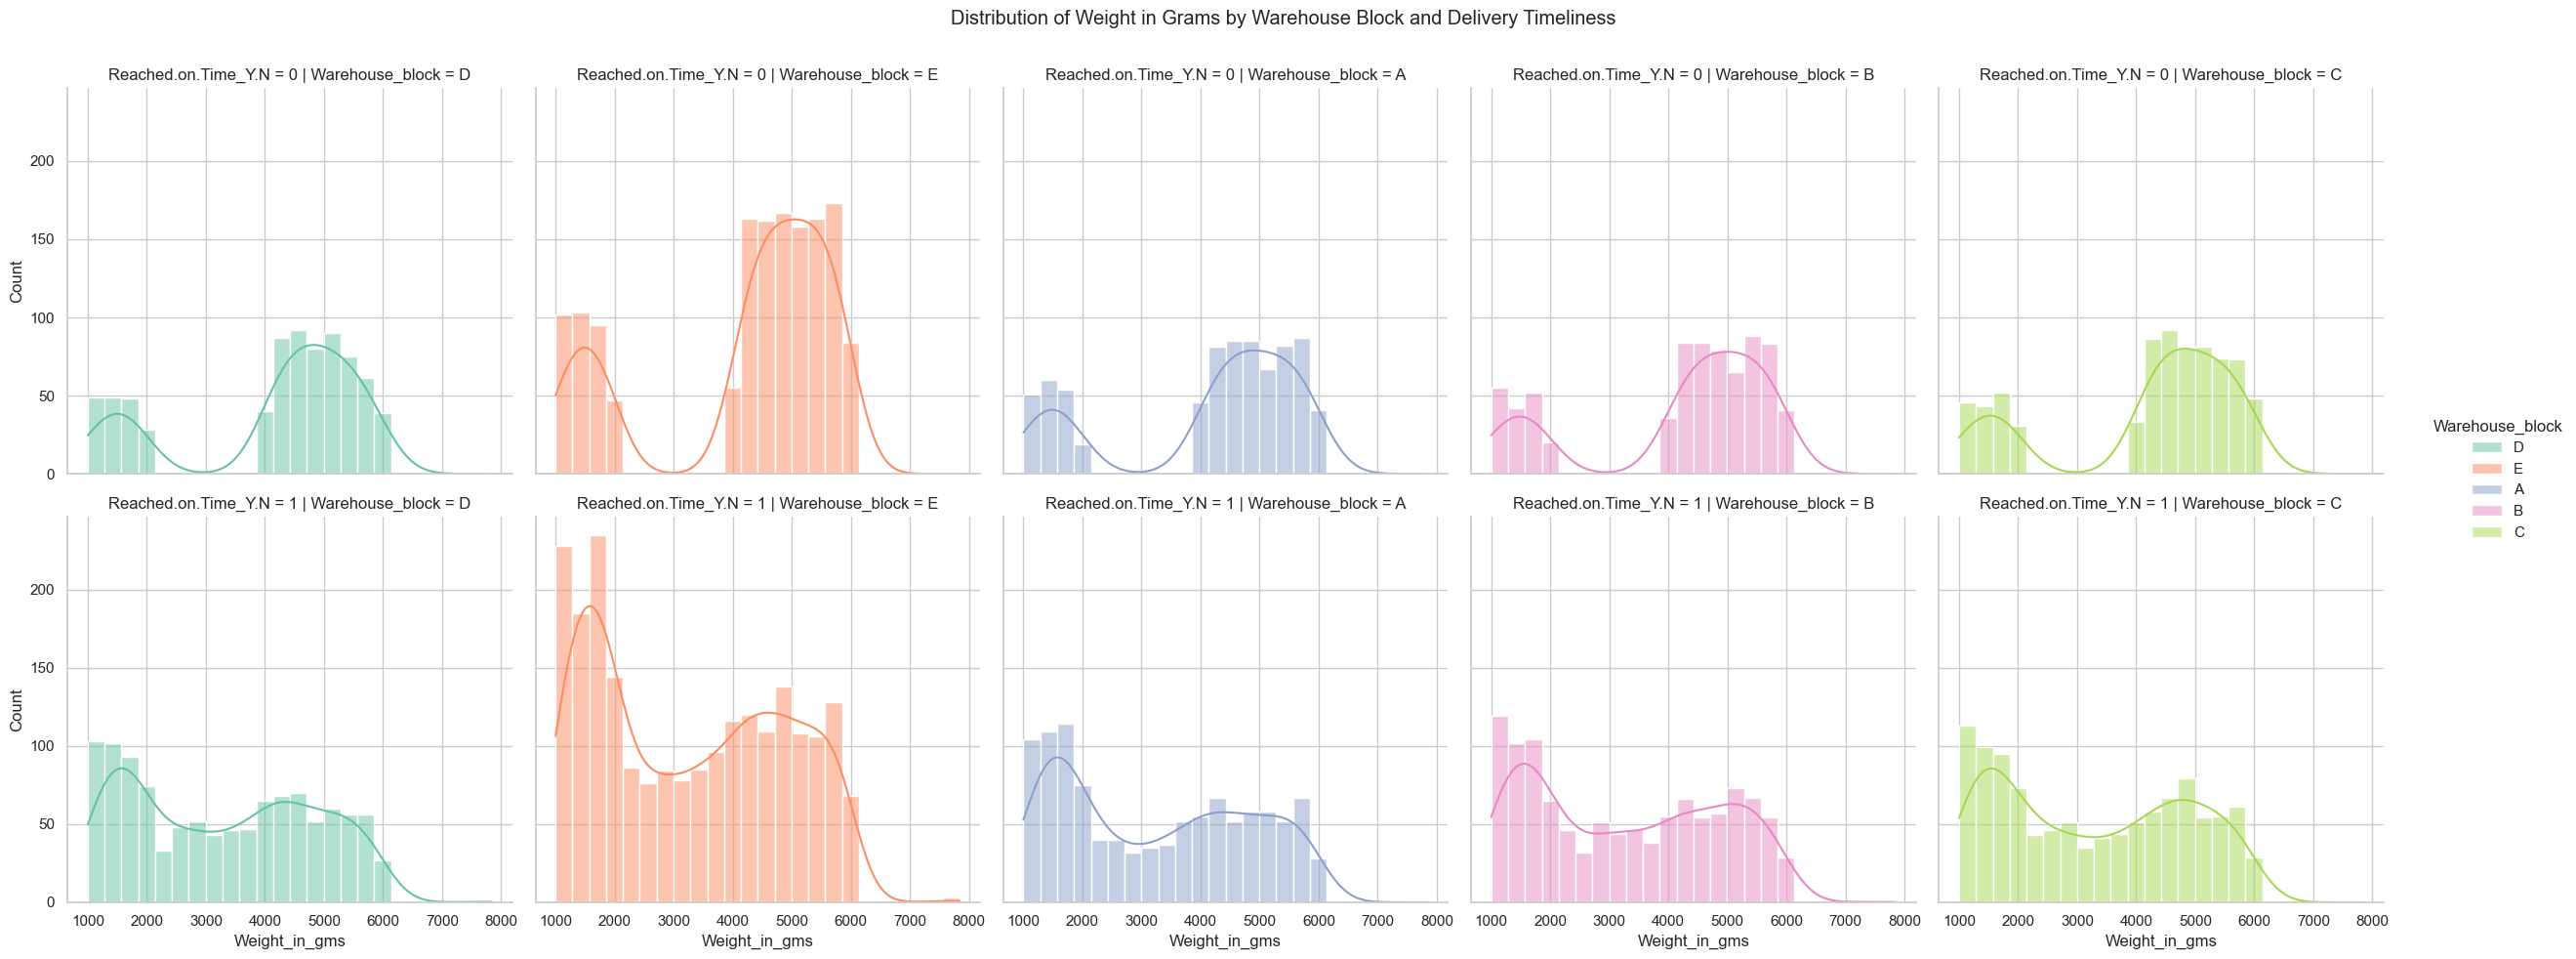

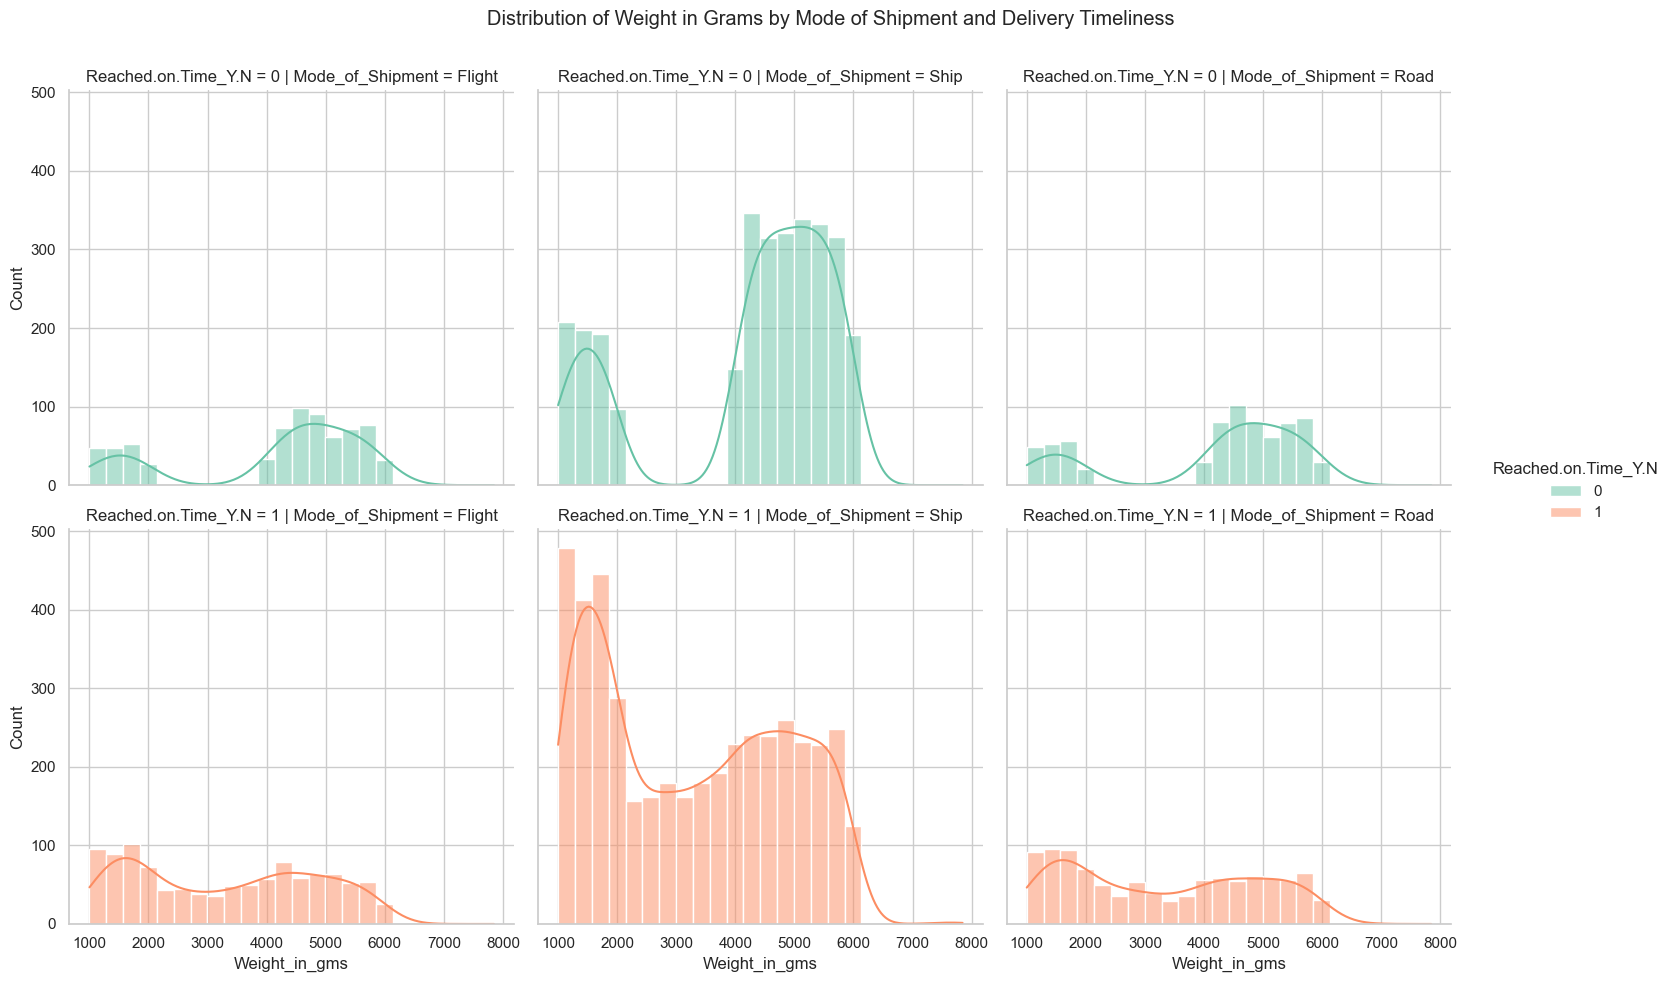

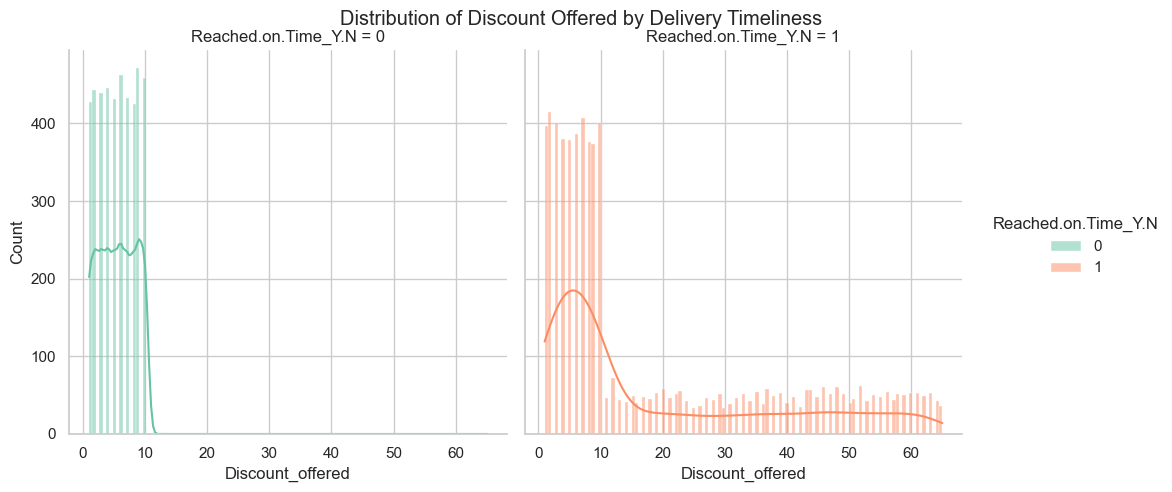

In [56]:
# Set the theme for the plots
sns.set(style="whitegrid")

# Create the first displot for 'Weight_in_gms' segmented by 'Warehouse_block' and 'Reached.on.Time_Y.N'
g1 = sns.displot(data=df, x='Weight_in_gms', col='Warehouse_block', hue='Warehouse_block', row='Reached.on.Time_Y.N', palette="Set2", kde=True)
g1.figure.subplots_adjust(top=0.9)
g1.figure.suptitle('Distribution of Weight in Grams by Warehouse Block and Delivery Timeliness')

# Create the second displot for 'Weight_in_gms' segmented by 'Mode_of_shipment' and 'Reached.on.Time_Y.N'
g2 = sns.displot(data=df, x='Weight_in_gms', col=df['Mode_of_Shipment'], hue='Reached.on.Time_Y.N', row='Reached.on.Time_Y.N', palette="Set2", kde=True)
g2.figure.subplots_adjust(top=0.9)
g2.figure.suptitle('Distribution of Weight in Grams by Mode of Shipment and Delivery Timeliness')

# Create the second displot for 'Discount_offered' segmented by 'Reached.on.Time_Y.N'
g3 = sns.displot(data=df, x='Discount_offered', col='Reached.on.Time_Y.N', palette="Set2", hue='Reached.on.Time_Y.N', kde=True)
g3.figure.subplots_adjust(top=0.9)
g3.figure.suptitle('Distribution of Discount Offered by Delivery Timeliness')

# Show the plots
plt.show()

In [64]:
# Checking max discount for on time product
disc_ontime = df['Discount_offered'][df['Reached.on.Time_Y.N'] == 0].value_counts().reset_index().sort_values(by='Discount_offered',ascending=False)

# Checking max discount for late product
disc_late = df['Discount_offered'][df['Reached.on.Time_Y.N'] == 1].value_counts().reset_index().sort_values(by='Discount_offered',ascending=False)

display(disc_ontime,disc_late)

,Discount_offered,count
2,10,459
0,9,471
9,8,425
6,7,433
1,6,462
7,5,432
3,4,445
5,3,439
4,2,443
8,1,427


,Discount_offered,count
60,65,36
50,64,43
21,63,53
35,62,49
23,61,53
...,...,...
7,5,378
6,4,380
3,3,401
0,2,415


From the graphs, there are several insights we can take:
1. All of the products between 2000 and 4000 gms always late regardless of the mode of shipment, warehouse block, or product importance.
2. The products that are late have higher discount offered with maximum of 65% discount while on time products have maximum of 10% discount offered.

In [51]:
# count of products weigh between 2000 and 4000 gms
df['Reached.on.Time_Y.N'][(df['Weight_in_gms'] > 2000) & (df['Weight_in_gms'] < 4000)].value_counts()

Reached.on.Time_Y.N
1    1786
Name: count, dtype: int64

In [73]:
# Calculate the proportion of on time and late deliveries
count_on_time = len(df[df['Reached.on.Time_Y.N'] == 0])
count_late = len(df[df['Reached.on.Time_Y.N'] == 1])
percent_ontime = count_on_time/(count_on_time + count_late)*100
percent_late = count_late/(count_on_time+count_late)*100
print('percent late with products between 2000 and 4000 gms :',percent_late)
print('percent on time with products between 2000 and 4000 gms :',percent_ontime)

percent late with products between 2000 and 4000 gms : 59.66906082371125
percent on time with products between 2000 and 4000 gms : 40.33093917628875


In [72]:
# Calculate the proportion of on time and late deliveries without products between 2000 and 4000 gms
count_late_new = len(df[(df['Reached.on.Time_Y.N'] == 1) & (df['Weight_in_gms'] > 2000) & (df['Weight_in_gms'] < 4000)])
percent_ontime_new = count_on_time/(count_on_time+count_late_new)*100
percent_late_new = count_late_new/(count_on_time+count_late_new)*100
print('percent late without products between 2000 and 4000 gms :',percent_late_new)
print('percent on time without products between 2000 and 4000 gms :',percent_ontime_new)

percent late without products between 2000 and 4000 gms : 28.704596592735456
percent on time without products between 2000 and 4000 gms : 71.29540340726454


## Conclusion:
* On this dataset, the only variable that have significant effect to delivery timeliness are weight and discount where other variables seemingly have no significant effect.
* Ship is the most used mode of shipment but the dataset doesn't provide the reliability of each mode of shipment.
* Warehouse block E handles approximately 2 times more products than the other warehouse block.
* Customer rating is not sensitive to delivery times.

## Recommendation:
* To improve the on time delivery, the company should not receive products between 2000 and 4000 gms until there is a solution from further analysis on how the products between 2000 and 4000 gms always late on delivery
* By improving the on time delivery, the company will give less discount to the customer which will increase the profit gained from transactions.
* Since the dataset didn't provide the capacity of each warehouse and assuming every warehouse block have the same capacity, the company need to distribute the load evenly between warehouses to prevent bottleneck in processing the delivery.